    읍면동명  전기자동차 등록건수
0    염치읍           7
1    배방읍          68
2    송악면          14
3    탕정면          15
4    음봉면          26
5    둔포면          22
6    영인면           7
7    인주면           5
8    선장면           3
9    도고면           7
10   신창면           7
11  온양1동          17
12  온양2동           6
13  온양3동          20
14  온양4동          13
15  온양5동          20
16  온양6동          22


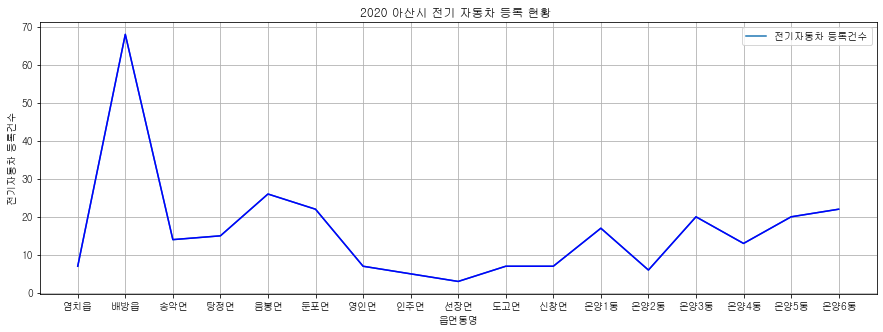

In [40]:
#아산시 전기차 등록 건수 

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
from pandas import DataFrame 

#한글 폰트 설정 
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#dataframe 수정 
data = pd.read_csv("Electric Vehicle Registration Status.csv")
data.drop(['시군구명', '보조금 신청 대기건수'], axis =1, inplace=True)
print(data)

#x,y범위 지정
x = data['읍면동명'].to_list()
y = data['전기자동차 등록건수'].to_list()

#그래프 사이즈 및 라벨 지정 
fig = data.plot(figsize=(15, 5))

plt.plot(x, y, 'b')
plt.title("2020 아산시 전기 자동차 등록 현황 ")
plt.xlabel("읍면동명")
plt.ylabel("전기자동차 등록건수")
plt.grid(True)
plt.show()


    읍면동명  충전기 개수
0    염치읍     0.0
1    배방읍    13.0
2    송악면     0.0
3    탕정면     2.0
4    음봉면     5.0
5    둔포면     1.0
6    영인면     2.0
7    인주면     0.0
8    선장면     0.0
9    도고면     0.0
10   신창면     0.0
11  온양1동     1.0
12  온양2동     0.0
13  온양3동     3.0
14  온양4동     5.0
15  온양5동     1.0
16  온양6동    13.0


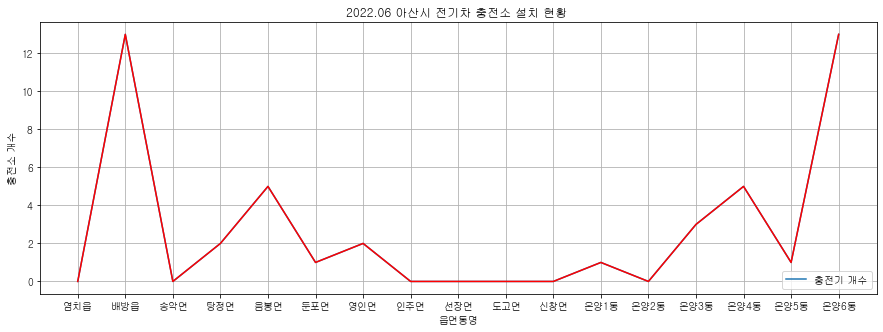

In [41]:
#아산시 전기차 충전소 설치 현황 

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
from pandas import DataFrame 

#한글 폰트 설정 
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#dataframe 수정------------------------------------------------------- 
data = pd.read_csv("Electric vehicle charging station installation status.csv")
data.drop(['시구', '설치장소', '지원차종'], axis =1, inplace=True)
data['충전기 개수'] = data['급속충전기(대)'] + data['완속충전기(대)']
data.drop(['급속충전기(대)', '완속충전기(대)'], axis =1, inplace=True)
data.rename(columns = {'주소' : '읍면동명'}, inplace =True)

#주소 중 중복 덧셈 
datat = data.groupby(['읍면동명']).sum()

#새 dataframe에 전기차 등록 현황에 있는 읍면동명 라벨 불러오기  
datax = pd.read_csv("Electric Vehicle Registration Status.csv")
datay = pd.DataFrame(index=range(0,17), columns = ['읍면동명'])
datay['읍면동명'] = datax['읍면동명']

#dataframe join 
dataz=pd.merge(left = datat, right =datay, how ="right", on="읍면동명")

#결측값(NaN) 제거
dz= dataz.fillna(0)
#--------------------------------------------------------------


#print(data)
#print(datay)
#print(datat)
print(dz)

#x,y범위 지정
x = dz['읍면동명'].to_list()
y = dz['충전기 개수'].to_list()

#그래프 사이즈 및 라벨 지정 
fig = dz.plot(figsize=(15, 5))

plt.plot(x, y, 'r')
plt.title("2022.06 아산시 전기차 충전소 설치 현황 ")
plt.xlabel("읍면동명")
plt.ylabel("충전소 개수")
plt.grid(True)
plt.show()


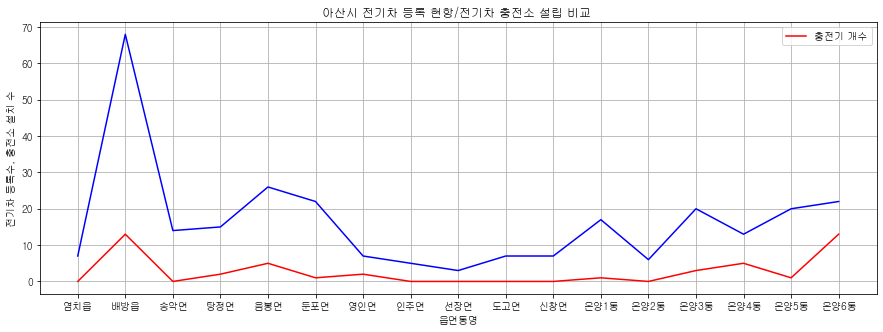

In [42]:
#아산시 전기차 등록 건수 + 아산시 전기차 충전소 설치 현황

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
from pandas import DataFrame 

#한글 폰트 설정 
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#dataframe 수정------------------------------------------------------- 
#전기차 등록 건수
data = pd.read_csv("Electric Vehicle Registration Status.csv")
data.drop(['시군구명', '보조금 신청 대기건수'], axis =1, inplace=True)


#전기차 충전소 설치 현황----------------------------------------------- 
datak = pd.read_csv("Electric vehicle charging station installation status.csv")
datak.drop(['시구', '설치장소', '지원차종'], axis =1, inplace=True)
datak['충전기 개수'] = datak['급속충전기(대)'] + datak['완속충전기(대)']
datak.drop(['급속충전기(대)', '완속충전기(대)'], axis =1, inplace=True)
datak.rename(columns = {'주소' : '읍면동명'}, inplace =True)

#주소 중 중복 덧셈----------------------------------------------------- 
datat = datak.groupby(['읍면동명']).sum()

#새 dataframe에 전기차 등록 현황에 있는 읍면동명 라벨 불러오기  
datax = pd.read_csv("Electric Vehicle Registration Status.csv")
datay = pd.DataFrame(index=range(0,17), columns = ['읍면동명'])
datay['읍면동명'] = datax['읍면동명']

#dataframe join 
dataz=pd.merge(left = datat, right =datay, how ="right", on="읍면동명")

#결측값(NaN) 제거
dz= dataz.fillna(0)
#--------------------------------------------------------------


#x,y범위 지정
x = data['읍면동명'].to_list()
y = data['전기자동차 등록건수'].to_list()

#그래프 사이즈 및 라벨 지정 
dz.plot(color = "red",figsize=(15, 5))
plt.plot(x, y, 'b')
plt.title("아산시 전기차 등록 현항/전기차 충전소 설립 비교 ")
plt.xlabel("읍면동명")
plt.ylabel("전기차 등록수, 충전소 설치 수")
plt.grid(True)
plt.show()
